In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# load data and set options
with open('data/AIDS_Classification_50000.csv') as f:
    # set categorical data types
    df = pd.read_csv(f, dtype={'hemo': 'category', 'homo': 'category', 'drugs': 'category', 'trt': 'category', 'oprior': 'category', 'z30': 'category', 'gender': 'category', 'str2': 'category', 'strat': 'category', 'symptom': 'category', 'treat': 'category', 'offtrt': 'category', 'infected': 'category'})

# set option for displaying all columns
pd.set_option('display.max_columns', None)

# drop race column -> us dataset 
df = df.drop(columns='race')

In [24]:
# basic infos on dataset
len(df), df.columns, df.shape

(50000,
 Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
        'oprior', 'z30', 'preanti', 'gender', 'str2', 'strat', 'symptom',
        'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected'],
       dtype='object'),
 (50000, 22))

In [25]:
# lookup on first dataset lines
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,18,1,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,224,1,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,0,0,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,513,1,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,4,1,0,3,0,0,1,500,443,1601,849,0


In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   time      50000 non-null  int64   
 1   trt       50000 non-null  category
 2   age       50000 non-null  int64   
 3   wtkg      50000 non-null  float64 
 4   hemo      50000 non-null  category
 5   homo      50000 non-null  category
 6   drugs     50000 non-null  category
 7   karnof    50000 non-null  int64   
 8   oprior    50000 non-null  category
 9   z30       50000 non-null  category
 10  preanti   50000 non-null  int64   
 11  race      50000 non-null  int64   
 12  gender    50000 non-null  category
 13  str2      50000 non-null  category
 14  strat     50000 non-null  category
 15  symptom   50000 non-null  category
 16  treat     50000 non-null  category
 17  offtrt    50000 non-null  category
 18  cd40      50000 non-null  int64   
 19  cd420     50000 non-null  int64   
 20  cd80  

In [19]:
# look for uniques values on categories
df.describe(include='category')

,trt,hemo,homo,drugs,oprior,z30,gender,str2,strat,symptom,treat,offtrt,infected
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,4,2,2,2,2,2,2,2,3,2,2,2,2
top,0,0,1,0,0,1,1,1,1,0,1,0,0
freq,18592,48326,32677,43389,47885,32044,42835,28760,21730,45827,36708,32889,34494


In [26]:
df.describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,34.164020,75.861991,96.831560,318.159560,319.079540,438.090100,1045.936440,905.938440
std,307.288688,7.091152,12.028730,5.091788,402.932765,102.525976,144.806831,488.617434,339.707976
min,66.000000,12.000000,42.361620,76.000000,0.000000,0.000000,81.000000,96.000000,173.000000
25%,542.000000,29.000000,68.253682,90.000000,0.000000,236.000000,327.000000,713.000000,649.000000
50%,1045.000000,34.000000,74.054115,100.000000,123.000000,299.000000,415.000000,885.000000,858.000000
75%,1136.000000,39.000000,81.142185,100.000000,503.000000,396.000000,531.000000,1245.000000,1084.000000
max,1231.000000,68.000000,149.830870,100.000000,2828.000000,930.000000,1119.000000,4656.000000,3538.000000


In [72]:
# function to plot a variable on 2 plots 1 for infected subjects, 1 for non-infected
def plot_by_infected(df, v, num=False):
    
    unique_infected_values = df['infected'].unique()
    fig, axs = plt.subplots(1, len(unique_infected_values), figsize=(12, 4))
    for i, value in enumerate(unique_infected_values):
        # Filter DataFrame for the current 'infected' value
        filtered_df = df[df['infected'] == value]
        
        if num:
            filtered_df[v].plot(kind='hist', ax=axs[i], bins=10)
        else:
        # Count occurrences of each category in the filtered DataFrame
            category_counts = filtered_df[v].value_counts()
            # Plot the data
            category_counts.plot(kind='bar',ax=axs[i])

        axs[i].set_xlabel('Category')
        axs[i].set_ylabel('Count')
        axs[i].set_title(f'Count of {v} for infected={value}')
    plt.tight_layout()
    plt.show()
    

<Axes: xlabel='infected'>

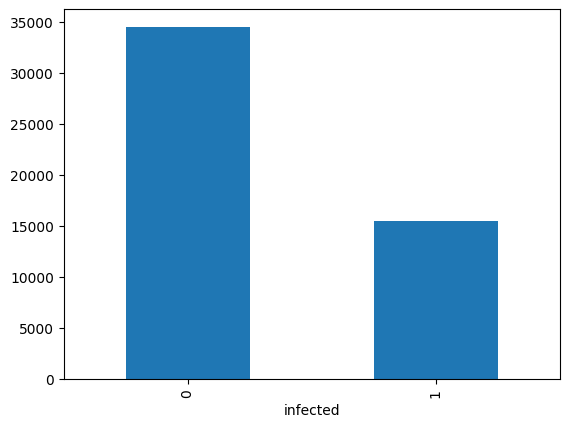

In [73]:
df['infected'].value_counts().plot(kind='bar')

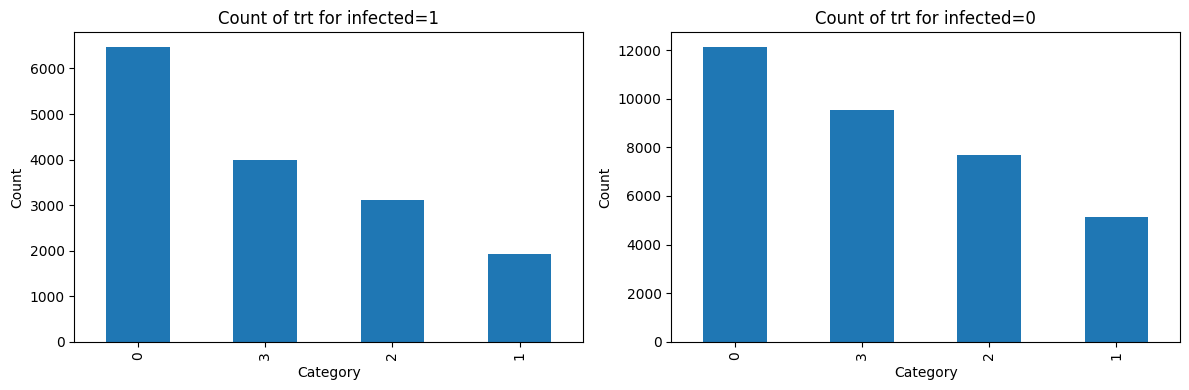

In [74]:
plot_by_infected(df, 'trt')

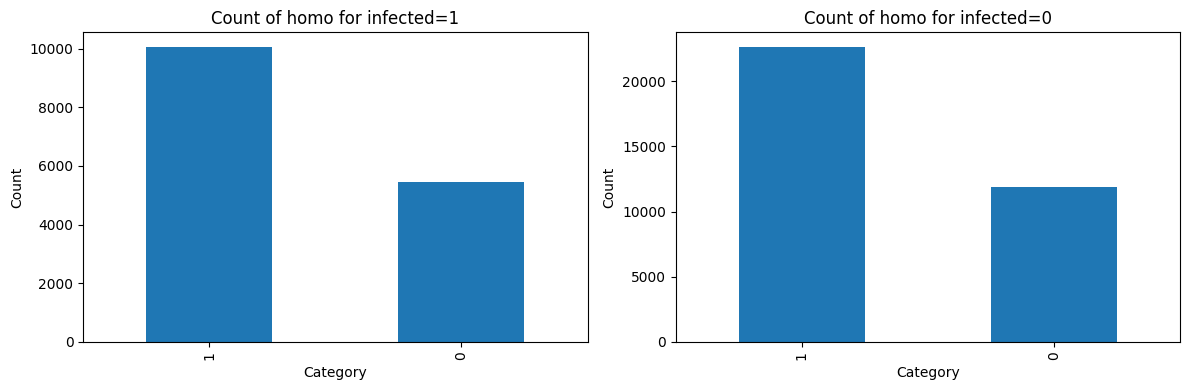

In [58]:
plot_by_infected(df, 'homo')

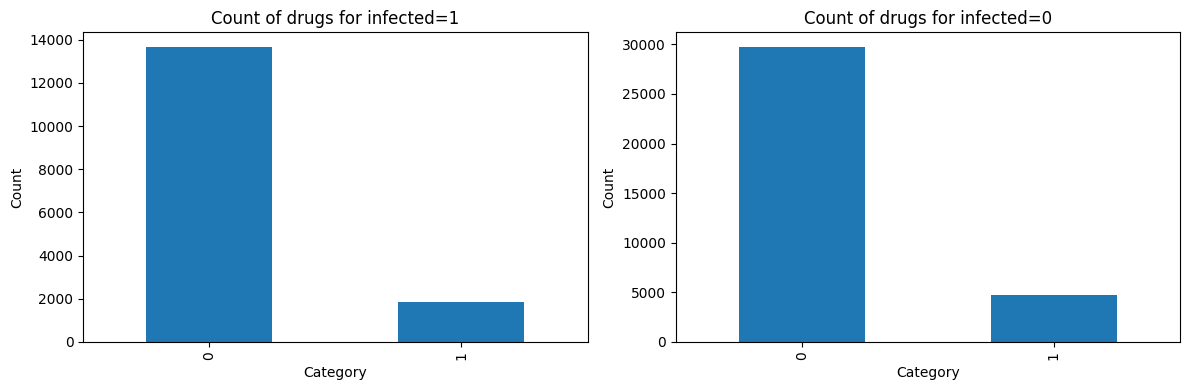

In [66]:
plot_by_infected(df, 'drugs')

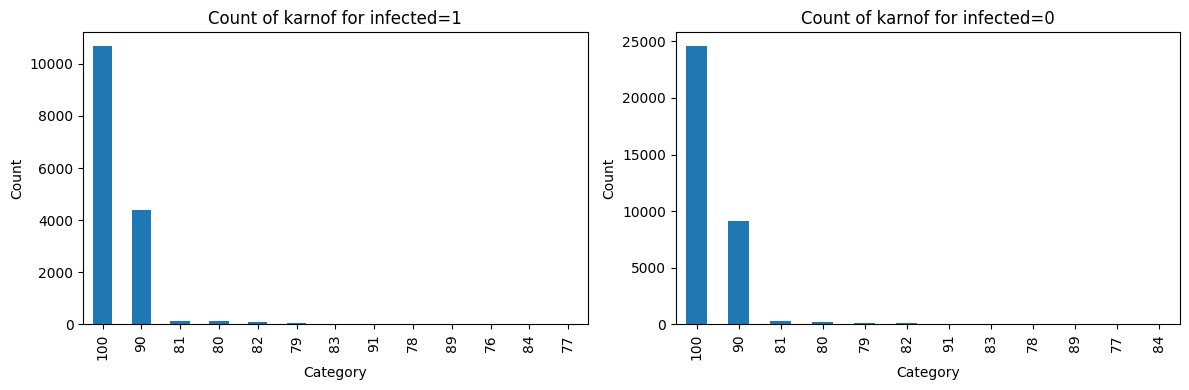

In [67]:
plot_by_infected(df, 'karnof')

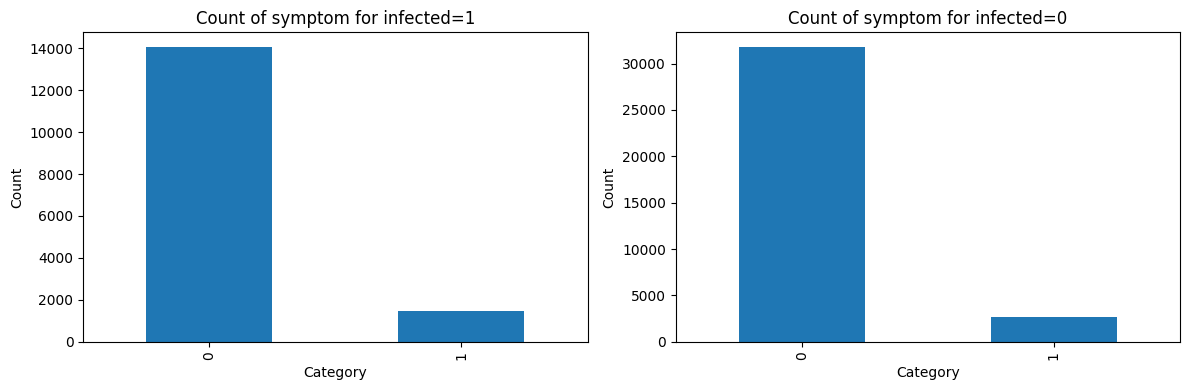

In [70]:
plot_by_infected(df, 'symptom')

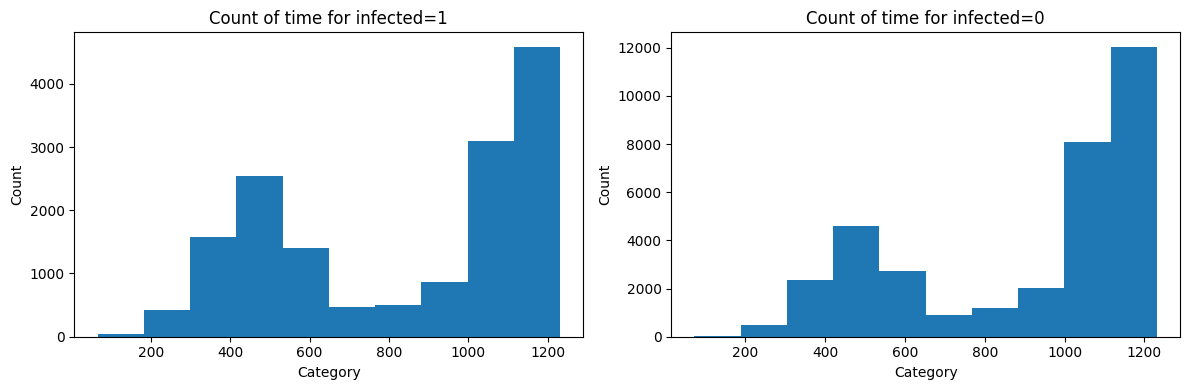

In [76]:
plot_by_infected(df, 'time', True)

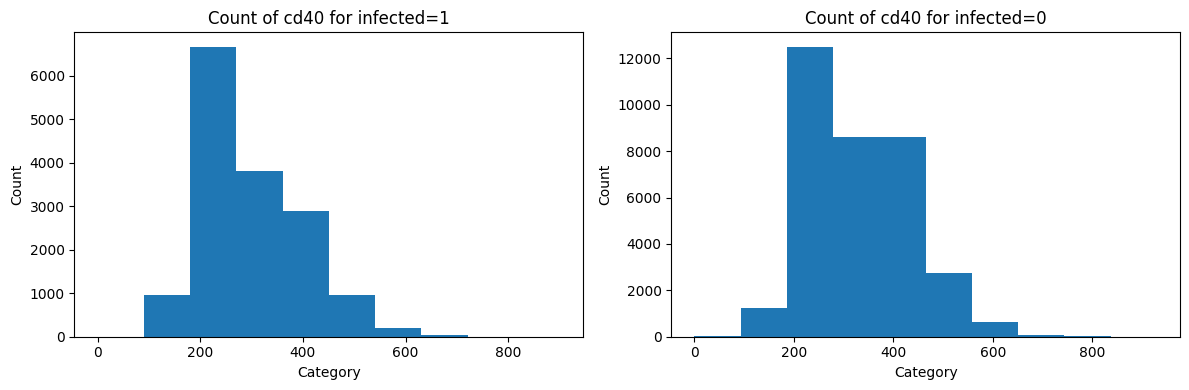

In [77]:
plot_by_infected(df, 'cd40', True)

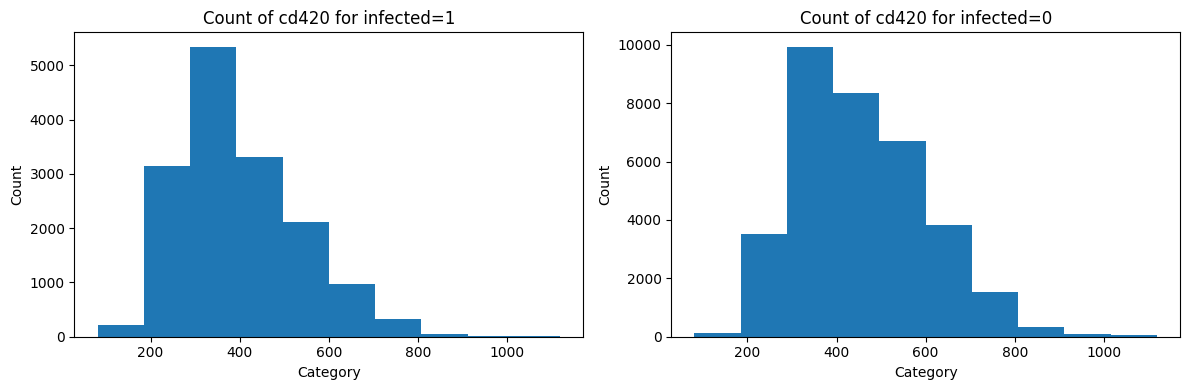

In [78]:
plot_by_infected(df, 'cd420', True)